# Project 3


In project 2, we conducted an exploratory analysis on the Admissions dataset. In this project, we will now build a model to predict whether someone is admitted to grad school based on their GRE score, undergrad GPA, and the prestige of their undergrad school.

In [216]:
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn import neighbors
from sklearn import grid_search
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

## Part 1. Load Dataset

#### 1.1 Let's load the dataset and check the first five rows

In [217]:
# load data
df = pd.read_csv("../assets/admissions.csv")

# check head
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Part 2. Pre-Process Data

#### 2.1 Check and remove missing values
**Reading**: Read Pandas docs on handling missing values:
[http://pandas.pydata.org/pandas-docs/stable/missing_data.html](http://pandas.pydata.org/pandas-docs/stable/missing_data.html)

In [218]:
# check for missing values in each column before dropping
print "Missing values:"
print df.isnull().sum()

Missing values:
admit       0
gre         2
gpa         2
prestige    1
dtype: int64


In [219]:
# drop missing values if there are any
if df.isnull().sum().sum():
    print "There are missing values"
    df = df.dropna(axis = 0) #the axis = 0 parameter is default
    print "Missing values dropped"

There are missing values
Missing values dropped


In [220]:
# re-check for missing values in each column after dropping
print "Missing values:"
print df.isnull().sum()

Missing values:
admit       0
gre         0
gpa         0
prestige    0
dtype: int64


#### 2.2 Check and convert all data types to numerical

In [221]:
# check data types
print df.dtypes

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object


In [222]:
# Get numerical columns
num_cols = set(df.dtypes[((df.dtypes=="int64")|(df.dtypes=="float64"))].index)
non_cols = set(df.columns)-num_cols

print "Numerical columns:"
print num_cols
print "Non-numerical columns:"
print non_cols

# here all columns are numeric; no need to convert
##diego's notes: i feel like this is the first time i've seen set() used, but now that I know abt it, I can use it

Numerical columns:
set(['admit', 'gre', 'gpa', 'prestige'])
Non-numerical columns:
set([])


#### 2.3 Check and create dummy variables for categorical features
**Reading**: API Docs for `get_dummies()`:
[http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

In [223]:
# create dummy variables for `prestige` feature
# this check allows this code to be run multiple times
if 'prestige' in df.columns:
      # get dummy variables for prestige
    df = df.join(pd.get_dummies(df.prestige, prefix='prestige'))
    # remove prestige column
    df.drop(['prestige'], axis=1, inplace=True)
    #diego note: I had some trouble here getting the tables to join bc I forgot the command. will have to be memorized.
    

In [224]:
# check for newly added columns
df.head()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0.0,0.0,1.0,0.0
1,1,660.0,3.67,0.0,0.0,1.0,0.0
2,1,800.0,4.00,1.0,0.0,0.0,0.0
3,1,640.0,3.19,0.0,0.0,0.0,1.0
4,0,520.0,2.93,0.0,0.0,0.0,1.0


## Part 3. Cross Validation

#### 3.1 Create separate training and test sets
**Reading**:

Read Scikit docs on cross validation:
[http://scikit-learn.org/stable/modules/cross_validation.html](http://scikit-learn.org/stable/modules/cross_validation.html)

Read Scikit docs on `sklearn.cross_validation.train_test_split()`:
[http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)

In [225]:
# set X and y (the feature and response)
X = df.drop(['admit'], axis=1)
y = df['admit']

In [226]:
# create separate training and test set with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = .4)
#diego note: I set the test size to .4, because the train/test split was 60/40, but i think the default is 75/25

In [227]:
# check size of training set
print X_train.shape, y_train.shape  #diego's note: it's 238 records

# check size of test set
print X_test.shape, y_test.shape #diego's note: test shape is 159 rows, or 66.8% of total

(238, 6) (238,)
(159, 6) (159,)


## Part 4. Build Model

#### 4.1 Build KNN Classifier
**Reading**: Read Scikit docs for `sklearn.neighbors.KNeighborsClassifier`:
[http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier)

In [228]:
# instantiate the estimator (knn classifier) using default params
knn = neighbors.KNeighborsClassifier()

# train model (knn classifier) on training set
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### 4.2 Evaluate Model
**Reading**: Read Scikit docs on evaluating models: [http://scikit-learn.org/stable/modules/model_evaluation.html](http://scikit-learn.org/stable/modules/model_evaluation.html)

In [229]:
#diego note: adding a section here on predicting the response values for the observations in X so I get into the habit of doing all the steps
y_pred = knn.predict(X_train)

In [230]:
# check model accuracy on test set
#diego's note: step four: check accuracy
from sklearn import metrics

accuracy = knn.score(X_test, y_test) 
print "Accuracy: " + str(accuracy)

Accuracy: 0.654088050314


**Reading**: Read Scikit docs on confusion matrix: [http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

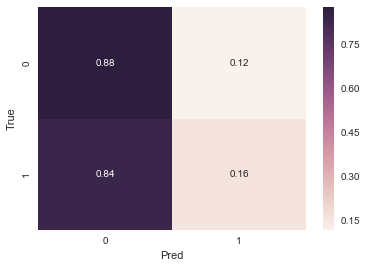

[[96 13]
 [42  8]]


In [231]:
# Get confusion matrix on test set
y_pred = knn.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print cm

## Part 5. Tune Model

#### 5.1 Perform Grid Search for `n_neighbors`
**Reading**: Read Scikit docs for `sklearn.grid_search.GridSearchCV`:
[http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html)

In [232]:
# set list of values to grid search over
k = range(2, 25)
params = {'n_neighbors': k}

# perform grid search using list of values
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params)
gs.fit(X_train, y_train)

# get best value to use

print gs.best_estimator_
#diego's note: my resulting    n-neighbors value was 2. will use this number below.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')


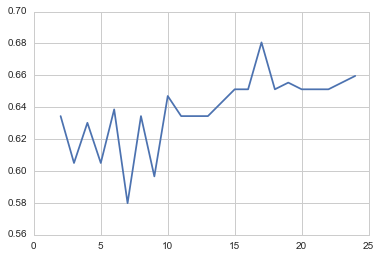

In [233]:
# plot search values vs. grid scores
plt.plot(k, [s[1] for s in gs.grid_scores_])

#### 5.2 Update model using best `n_neighbors`

In [234]:
# instantiate knn classifier using updated params
knn = neighbors.KNeighborsClassifier(n_neighbors=2)

# train updated knn classifier on training set
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

#### 5.3 Evaluate updated model

In [235]:
# check updated model accuracy on test set
accuracy = knn.score(X_test, y_test)
print "Accuracy: " + str(accuracy)
#diego note: new accuracy score is 0.63522

Accuracy: 0.666666666667


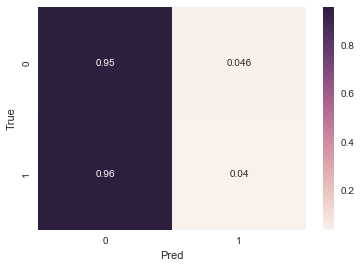

[[104   5]
 [ 48   2]]


In [236]:
# Get confusion matrix on test set
y_pred = knn.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print cm

**Note** This is not a good model. Perhaps the data set is too small or the features themselves do not have enough predictive capability. However, the steps taken in this project are valid and applicable to future classifications problems.

**Question** Based on the confusion matrix above, does the model have type I errors or type II errors?

**Answer:**

In [237]:
#It has both Type I (11) and Type 2(47) errors.